In [1]:
import urllib.request
import urllib.parse
import json
import pprint

In [2]:
class CoreApiRequestor:

    def __init__(self, endpoint, api_key):
        self.endpoint = endpoint
        self.api_key = api_key
        #defaults
        self.pagesize = 100
        self.page = 1

    def parse_response(self, decoded):
        res = []
        for item in decoded['data']:
            doi = None
            if 'identifiers' in item:
                for identifier in item['identifiers']:
                    if identifier and identifier.startswith('doi:'):
                        doi = identifier
                        break
            res.append([item['title'], doi])
        return res

    def request_url(self, url):
        with urllib.request.urlopen(url) as response:
            html = response.read()
        return html

    def get_method_query_request_url(self,method,query,fullText,page):
        if (fullText):
            fullText = 'true'
        else:
            fullText = 'false'
        params = {
            'apiKey':self.api_key,
            'page':page,
            'pageSize':self.pagesize,
            'fulltext':fullText
        }
        return self.endpoint + method + '/' + urllib.parse.quote(query) + '?' + urllib.parse.urlencode(params)

    def get_up_to_100_pages_of_query(self,method,query,fulltext):
        url = self.get_method_query_request_url(method,query,fulltext,1)
        all_articles=[]
        resp = self.request_url(url)
        result = json.loads(resp.decode('utf-8'))
        all_articles.append(result)
        if (result['totalHits']>100):
            numOfPages = int(result['totalHits']/self.pagesize)  #rounds down
            if (numOfPages>100):
                numOfPages=100
            for i in range(2,numOfPages):
                url = self.get_method_query_request_url(method,query,False,i)
                print(url)
                resp =self.request_url(url)
                all_articles.append(json.loads(resp.decode('utf-8')))
        return all_articles

In [3]:
'''
Example invokation
'''
# init 
endpoint = 'https://core.ac.uk/api-v2'

'''
********************************************
Add your own api key below
'''
api_key = 'AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4'
'''
********************************************
'''
method = '/search'
topic = 'organic AND cage'

api = CoreApiRequestor(endpoint,api_key)

In [6]:
url = api.get_method_query_request_url(method,topic,False,1)
url

'https://core.ac.uk/api-v2/search/organic%20AND%20cage?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=1&pageSize=100&fulltext=false'

In [7]:
'''
Get results
'''
result = api.request_url(url)

In [8]:
result_as_json = json.loads(result.decode('utf-8'))
result_as_json

{'status': 'OK',
 'totalHits': 78713,
 'data': [{'_index': 'articles_2019_06_05',
   '_type': 'article',
   '_id': '155504973',
   '_score': 24.497066,
   '_source': {'id': '155504973',
    'authors': ['Liu, Shuming',
     'Zhang, Qianyan',
     'Yu, Yuming',
     'Gan, Liangbing'],
    'citations': [],
    'contributors': ['Gan, LB (reprint author), Chinese Acad Sci, Inst Chem, Beijing Natl Lab Mol Sci, CAS Key Lab Organ Solids, Beijing 100080, Peoples R China.',
     'Chinese Acad Sci, Inst Chem, Beijing Natl Lab Mol Sci, CAS Key Lab Organ Solids, Beijing 100080, Peoples R China.',
     'Peking Univ, Coll Chem &amp; Mol Engn, Minist Educ, Key Lab Bioorgan Chem &amp; Mol Engn, Beijing 100871, Peoples R China.',
     'Shanghai Inst Organ Chem, State Key Lab Organometall Chem, Shanghai 200032, Peoples R China.',
     'Handan Coll, Dept Chem, Handan 056005, Peoples R China.'],
    'datePublished': '2012',
    'deleted': 'ALLOWED',
    'description': 'Open-cage fullerene derivative 2, C-5

In [9]:
len(result_as_json)

3

In [118]:
'''
Get first 20 pages of results (=20 pages * 100 articles per page = 2000 articles)


'''
multi_page_result = api.get_up_to_100_pages_of_query(method,topic,False)
# Frist page:
multi_page_result[0]

https://core.ac.uk/api-v2/journals/search/organic%20AND%20cage?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=2&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/journals/search/organic%20AND%20cage?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=3&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/journals/search/organic%20AND%20cage?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=4&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/journals/search/organic%20AND%20cage?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=5&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/journals/search/organic%20AND%20cage?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=6&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/journals/search/organic%20AND%20cage?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=7&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/journals/search/organic%20AND%20cage?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=8&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/journals

{'status': 'OK',
 'totalHits': 2080,
 'data': [{'title': 'Organic Communications',
   'identifiers': ['oai:doaj.org/journal:7cc331db50db4a72b479549f54b4082e',
    'issn:1307-6175',
    'url:https://doaj.org/toc/1307-6175'],
   'subjects': ['synthetic organic chemistry',
    'mechanistic organic chemistry',
    'Organic chemistry',
    'QD241-441',
    'Chemistry',
    'QD1-999',
    'Science',
    'Q'],
   'language': 'English',
   'publisher': 'ACG Publications'},
  {'title': 'Organic Photonics and Photovoltaics',
   'identifiers': ['oai:doaj.org/journal:03d49f3ce5404098998e1bc0d7d33b04',
    'issn:2299-3177',
    'url:https://doaj.org/toc/2299-3177'],
   'subjects': ['organic materials synthesis',
    'fundamental opto-electronic properties',
    'photonic devices',
    'organic semiconductors and conductors',
    'interfacial materials',
    'Applied optics. Photonics',
    'TA1501-1820'],
   'language': 'EN',
   'rights': 'CC BY-NC-ND',
   'publisher': 'De Gruyter Online'},
  {'tit

In [10]:
import pickle

topic = 'organic AND cage'
ftopic = topic.replace(" ","")

queryOnlyFT = '(title:('+topic+') OR description:('+topic+') OR fullText:('+topic+')) AND fullText:*'
query = '(title:('+topic+') OR description:('+topic+') OR fullText:('+topic+'))'

# fetch all articles (with or without fulltext) matching topic query in title or abstract or fulltext
try:
    all_articles = pickle.load(open('all_articles_on'+ftopic+'.pkl','rb'))
except (OSError,IOError) as e:
    all_articles = api.get_up_to_100_pages_of_query(method,query,False)
    pickle.dump(all_articles,open('all_articles_on'+ftopic+'.pkl','wb'),pickle.HIGHEST_PROTOCOL)

https://core.ac.uk/api-v2/search/%28title%3A%28organic%20AND%20cage%29%20OR%20description%3A%28organic%20AND%20cage%29%20OR%20fullText%3A%28organic%20AND%20cage%29%29?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=2&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/search/%28title%3A%28organic%20AND%20cage%29%20OR%20description%3A%28organic%20AND%20cage%29%20OR%20fullText%3A%28organic%20AND%20cage%29%29?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=3&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/search/%28title%3A%28organic%20AND%20cage%29%20OR%20description%3A%28organic%20AND%20cage%29%20OR%20fullText%3A%28organic%20AND%20cage%29%29?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=4&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/search/%28title%3A%28organic%20AND%20cage%29%20OR%20description%3A%28organic%20AND%20cage%29%20OR%20fullText%3A%28organic%20AND%20cage%29%29?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=5&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/search

https://core.ac.uk/api-v2/search/%28title%3A%28organic%20AND%20cage%29%20OR%20description%3A%28organic%20AND%20cage%29%20OR%20fullText%3A%28organic%20AND%20cage%29%29?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=36&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/search/%28title%3A%28organic%20AND%20cage%29%20OR%20description%3A%28organic%20AND%20cage%29%20OR%20fullText%3A%28organic%20AND%20cage%29%29?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=37&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/search/%28title%3A%28organic%20AND%20cage%29%20OR%20description%3A%28organic%20AND%20cage%29%20OR%20fullText%3A%28organic%20AND%20cage%29%29?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=38&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/search/%28title%3A%28organic%20AND%20cage%29%20OR%20description%3A%28organic%20AND%20cage%29%20OR%20fullText%3A%28organic%20AND%20cage%29%29?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=39&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/se

https://core.ac.uk/api-v2/search/%28title%3A%28organic%20AND%20cage%29%20OR%20description%3A%28organic%20AND%20cage%29%20OR%20fullText%3A%28organic%20AND%20cage%29%29?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=70&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/search/%28title%3A%28organic%20AND%20cage%29%20OR%20description%3A%28organic%20AND%20cage%29%20OR%20fullText%3A%28organic%20AND%20cage%29%29?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=71&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/search/%28title%3A%28organic%20AND%20cage%29%20OR%20description%3A%28organic%20AND%20cage%29%20OR%20fullText%3A%28organic%20AND%20cage%29%29?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=72&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/search/%28title%3A%28organic%20AND%20cage%29%20OR%20description%3A%28organic%20AND%20cage%29%20OR%20fullText%3A%28organic%20AND%20cage%29%29?apiKey=AWoHihUf3uPjVq9gOcGTvp8rD1d0NQL4&page=73&pageSize=100&fulltext=false
https://core.ac.uk/api-v2/se

In [74]:
all_articles[0]['data'][0]['_source']['publisher']

"'Wiley'"

In [45]:
'''
Count years

all_articles is a list of 20 resultsets (pages) - total 2000 articles
each page has its data under the 'data' field 
data is a result of 100 results 
each result has fields (title, description, ..), we are interested in the year one -if exists
'''
years_list = []
for hits in all_articles:
    for hit in hits['data']:
        if 'datePublished' in hit['_source']:
            #print('found')
            if hit['_source']['datePublished']:
                re = hit['_source']['datePublished']
                yr = re[:4]
                try:
                    yr = int(yr)
                
                    years_list.append(yr)
                except:
                    continue

In [46]:
len(years_list)

9463

In [57]:
recent_y = [yr for yr in years_list if (yr > 2000 and yr <=2021)]

In [47]:
from collections import Counter
print(Counter(years_list))

Counter({2017: 922, 2016: 919, 2015: 833, 2014: 797, 2018: 696, 2013: 601, 2012: 557, 2019: 534, 2011: 522, 2010: 391, 2009: 343, 2007: 321, 2008: 252, 2020: 190, 2006: 185, 2005: 143, 2002: 130, 2004: 123, 2003: 110, 2001: 87, 2000: 75, 1995: 55, 1998: 55, 1999: 52, 1994: 43, 1996: 40, 1990: 39, 1997: 38, 1988: 33, 1991: 31, 1993: 29, 1992: 29, 1976: 19, 1984: 17, 1987: 16, 1989: 16, 1986: 15, 1980: 12, 1983: 12, 1985: 12, 1979: 12, 1969: 10, 1975: 10, 1965: 10, 1982: 9, 1966: 9, 1968: 7, 1961: 7, 1955: 6, 1971: 5, 1981: 5, 1962: 5, 1957: 5, 1956: 4, 1953: 4, 1973: 4, 1978: 4, 1967: 4, 1958: 4, 1959: 3, 1972: 3, 1964: 3, 1970: 3, 1939: 3, 1950: 2, 1954: 2, 1391: 2, 1931: 2, 1906: 2, 1941: 2, 1974: 2, 1913: 2, 2557: 1, 2558: 1, 1907: 1, 1937: 1, 1977: 1, 1904: 1, 1963: 1, 1951: 1, 1940: 1, 1960: 1, 1936: 1, 1949: 1, 1942: 1, 1945: 1})


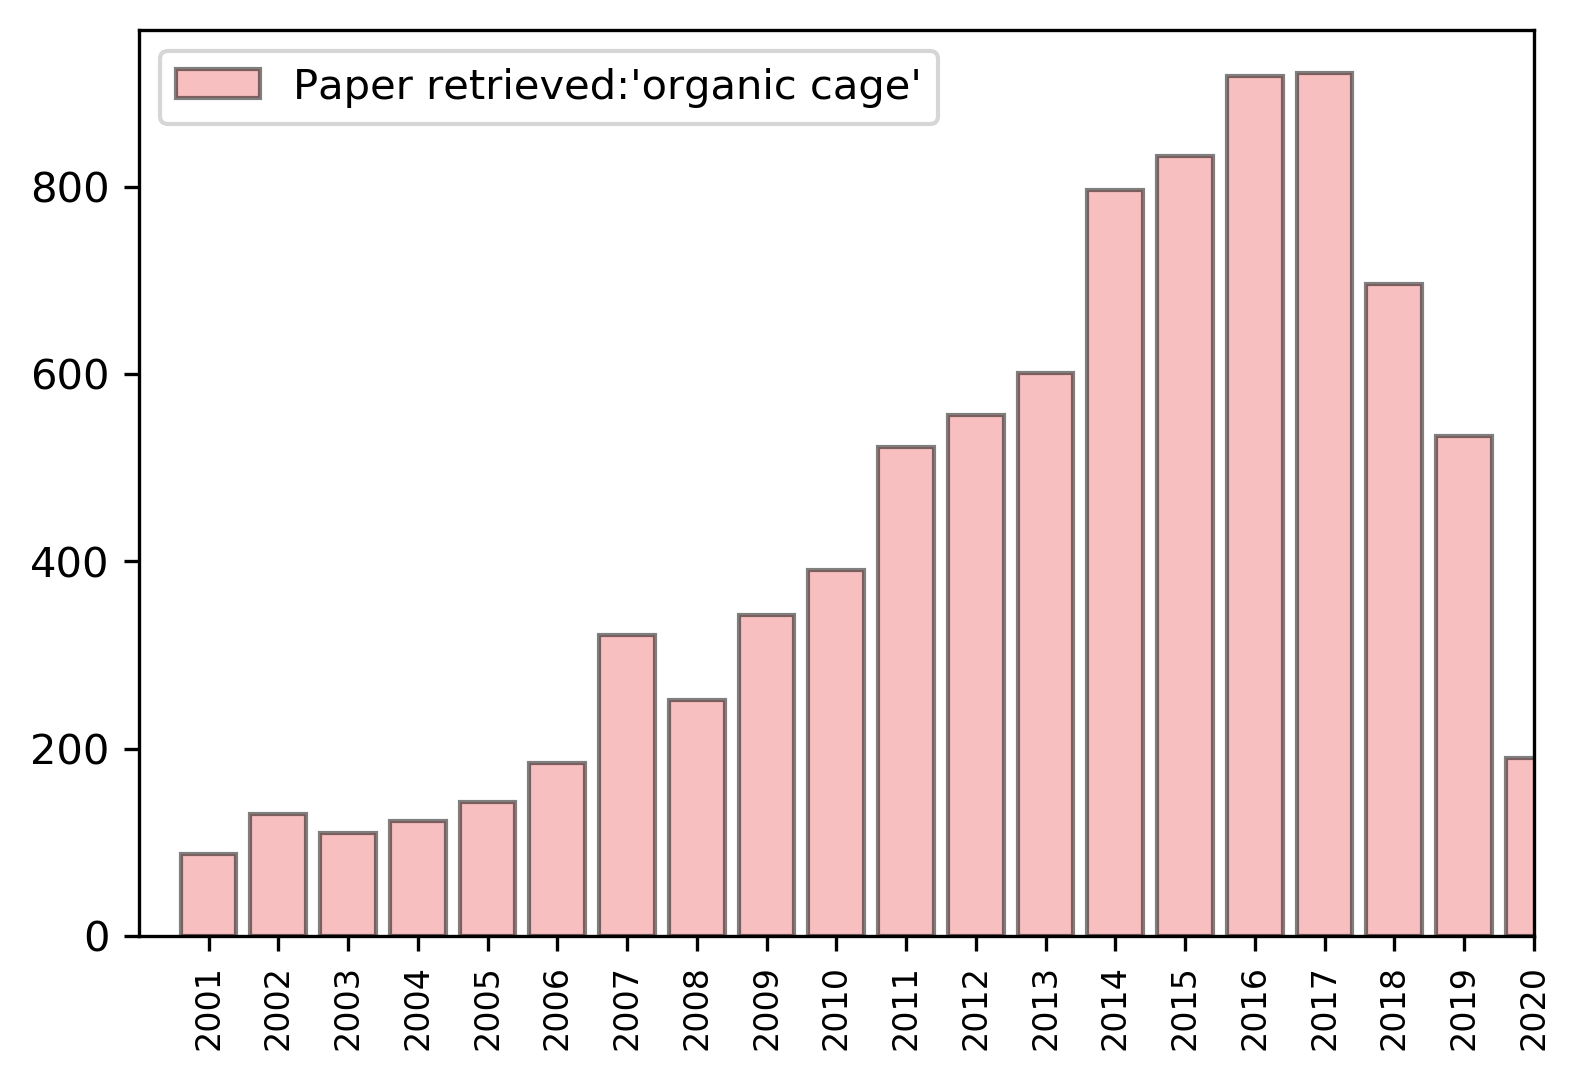

In [101]:
cnts = Counter(recent_y)
labels, values = zip(*sorted(cnts.items(), key=lambda x: x[0]))
indices = np.arange(len(labels))
fix, ax = plt.subplots()
ax.bar(indices+1, values, 0.8, color='lightcoral',edgecolor='black', alpha=0.5, label='Paper retrieved:\'organic cage\'')
plt.xlim([0, indices.size])
plt.xticks(indices+1, labels, fontsize=8, rotation='vertical')
plt.legend()
ax.yaxis.grid(False)

In [91]:

'''
Collect repositories info
'''
repos_list = []
pub_list = []
for hits in all_articles:
    for hit in hits['data']:
        pub = hit['_source']['publisher']
        if pub is not None and pub[0] == '\'':
                pub = pub[1:-1]

        print(hit['_source']['publisher'])
        pub_list.append(pub)
        if 'publisher' in hit:
            for repo in hit['publisher']:
                #print(repo)
                if 'id' in repo:
                    repos_list.append(repo['id'])

'Wiley'
None
None
'Springer Science and Business Media LLC'
'Royal Society of Chemistry (RSC)'
None
Bogor Agricultural University
'American Chemical Society (ACS)'
'Institut Pertanian Bogor'
'Institut Pertanian Bogor'
'Royal Society of Chemistry (RSC)'
Oklahoma State University
None
None
None
'American Chemical Society (ACS)'
'Wiley'
None
'American Chemical Society (ACS)'
American Chemical Society
'American Chemical Society (ACS)'
None
ROYAL SOC CHEMISTRY
ROYAL SOC CHEMISTRY
University of Zagreb. Faculty of Science. Department of Biology.
None
University of Zagreb. Faculty of Science. Department of Biology.
'Royal Society of Chemistry (RSC)'
None
'Wiley'
ROYAL SOC CHEMISTRY
None
None
'Wiley'
'Royal Society of Chemistry (RSC)'
'Royal Society of Chemistry (RSC)'
None
None
None
University of Banja Luka, Faculty of Agriculture
None
International Union of Pure and Applied Chemistry
'Royal Society of Chemistry (RSC)'
'American Association for Cancer Research (AACR)'
None
None
'American Chemi

Faculty of Animal Agriculture, Diponegoro University
Iowa State University Digital Repository
National Fisheries Resources Research Institute (NaFIRRI)
'American Chemical Society (ACS)'
'National University of Pharmacy'
None
In: In: INTERNATIONAL WORKSHOP ADVANCES IN CLEANER PRODUCTION, 4., 2013, São Paulo. Integrating cleaner production into sustainability strategies: Anais... São Paulo: UNIP, 2012. 9 p.
American Institute of Physics
Office of Scientific and Technical Information  (OSTI)
Office of Scientific and Technical Information  (OSTI)
Philipps-Universität Marburg, Chemie
Diponegoro University
ScholarlyCommons
European Online Journal of Natural and Social Sciences
'National University of Pharmacy'
American Chemical Society (ACS)
SAGE Publications
Informa UK Limited
None
None
None
Digital Commons @ IWU
Wiley
None
BioMed Central
Deakin University, Faculty of Science, Engineering and Built Environment, School of Life and Environmental Sciences
eScholarship, University of California

Aquaculture Department, Southeast Asian Fisheries Development Center
University of Novi Sad
American Chemical Society (ACS)
None
None
Croatian Chemical Society
None
'Indonesian Aquaculture Society'
'Royal Society of Chemistry (RSC)'
International Union of Pure and Applied Chemistry
Statutory Research Tasks Unit for Nature & the Environment
None
None
Elsevier
CAMBRIDGE
None
Scholar Commons
[S.l. : s.n.]
None
Marine Institute
'Wiley'
Office of Scientific and Technical Information  (OSTI)
Office of Scientific and Technical Information  (OSTI)
None
None
CMFRI & NFDB
Stellenbosch : University of Stellenbosch
Hindawi Limited
None
None
'Springer Science and Business Media LLC'
'Organisation for Economic Co-Operation and Development  (OECD)'
None
DigitalCommons@CalPoly
'Royal Society of Chemistry (RSC)'
None
None
None
None
'Springer Science and Business Media LLC'
'Central Marine Fisheries Research Institute, Kochi'
The University of St Andrews
Energy, Geoscience, Infrastructure and Society
No

Springer Nature
Wiley
Mataram University
None
'Wiley'
Texas Agricultural Experiment Station
Wiley
Stellenbosch : Stellenbosch University
None
OpenSIUC
None
'Springer Science and Business Media LLC'
Hellenic Centre for Marine Research
None
None
None
'Public Library of Science (PLoS)'
None
None
None
None
Public Library of Science
None
Australian Government Department of Sustainability, Environment, Water, Population and Communities
FapUNIFESP (SciELO)
None
None
None
UCL (University College London)
Texas Agricultural Extension Service
'MDPI AG'
International Union of Crystallography
'Public Library of Science (PLoS)'
Royal Society of Chemistry
Springer Nature
Digital Scholarship@UNLV
Opus: Research \u26 Creativity at IPFW
MDPI
Hindawi Limited
DigitalCommons@University of Nebraska - Lincoln
None
Iranian Fisheries Research Organization
None
Office of Scientific and Technical Information  (OSTI)
'International Union of Crystallography (IUCr)'
None
None
Global Researchers Journals
None
None
N

Springer Science+Business Media, LLC
京都大学化学研究所
Università degli studi di Trieste
Thê Gioi publishers
'Royal Society of Chemistry (RSC)'
University of Leicester
Gottfried Wilhelm Leibniz Universität Hannover
Digital Commons @Brockport
Springer Nature
'American Chemical Society (ACS)'
BioMed Central
Springer Nature
SLU/Dept. of Ecology
DigitalCommons@University of Nebraska - Lincoln
'American Chemical Society (ACS)'
Indonesian Student Association in Thailand (PERMITHA)
Instituto de Pesquisas Ambientais em Bacias Hidrograficas (IPABHi)
BILINGUAL PUBLISHING CO
The Biophysical Society. Published by Elsevier Inc.
'Editorial CSIC'
None
IntechOpen
'Pisa University Press'
Public Library of Science
'Organisation for Economic Co-Operation and Development  (OECD)'
Royal Society of Chemistry (RSC)
None
Iowa State University Digital Repository
The Optical Society
The Optical Society
Publications Office of the European Union
None
'MDPI AG'
None
BioMed Central
None
University of Groningen, Stratingh I

None
Springer
Wiley-Blackwell
'Columbia University Libraries/Information Services'
University of New Hampshire Scholars\u27 Repository
None
ICAR-Central Marine Fisheries Research Institute
Elsevier
Norwegian University of Science and Technology (NTNU) Library
GEOMAR Helmholtz Centre for Ocean Research Kiel
University of Missouri--Columbia. Extension Division
None
Fakultät 8 - Naturwissenschaftlich-Technische Fakultät III. Fachrichtung 8.1 - Chemie
Springer Nature
None
Office of Scientific and Technical Information  (OSTI)
Athabasca University Press
University of Canterbury. Chemistry
HAL CCSD
Memorial University of Newfoundland
American Chemical Society
None
Universitas Atma Jaya Yogyakarta
FapUNIFESP (SciELO)
'Wiley'
Wiley-Blackwell Publishing, Inc.
None
Department of Drama, Dance and Music, Semarang State University
[s.n.]
Elsevier BV
None
John Wiley & Sons
None
Universitas Atma Jaya Yogyakarta
HAL CCSD
None
Croatian Chemical Society
'Elsevier BV'
Wiley
University of Windsor
Oklahoma

In [92]:
print(Counter(pub_list))

Counter({None: 2629, 'Royal Society of Chemistry (RSC)': 325, 'Springer Nature': 319, 'American Chemical Society (ACS)': 316, 'Wiley': 301, 'Elsevier BV': 263, 'Hindawi Limited': 159, 'Springer Science and Business Media LLC': 151, 'Office of Scientific and Technical Information  (OSTI)': 122, 'FapUNIFESP (SciELO)': 116, 'Iowa State University Digital Repository': 107, 'American Chemical Society': 88, 'Elsevier': 83, 'Scholar Commons': 77, 'MDPI AG': 73, 'Aquaculture Department, Southeast Asian Fisheries Development Center': 65, 'IntechOpen': 63, 'Institute for Chemical Research, Kyoto University': 59, 'BioMed Central': 57, 'eScholarship, University of California': 56, 'Royal Society of Chemistry': 56, 'DigitalCommons@University of Nebraska - Lincoln': 56, 'International Union of Crystallography': 51, 'Informa UK Limited': 50, 'Organisation for Economic Co-Operation and Development  (OECD)': 48, 'HAL CCSD': 46, 'Agency for Marine and Fisheries Research and Development': 44, 'Springer':

In [49]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [50]:
plt.rcParams['figure.dpi'] = 300

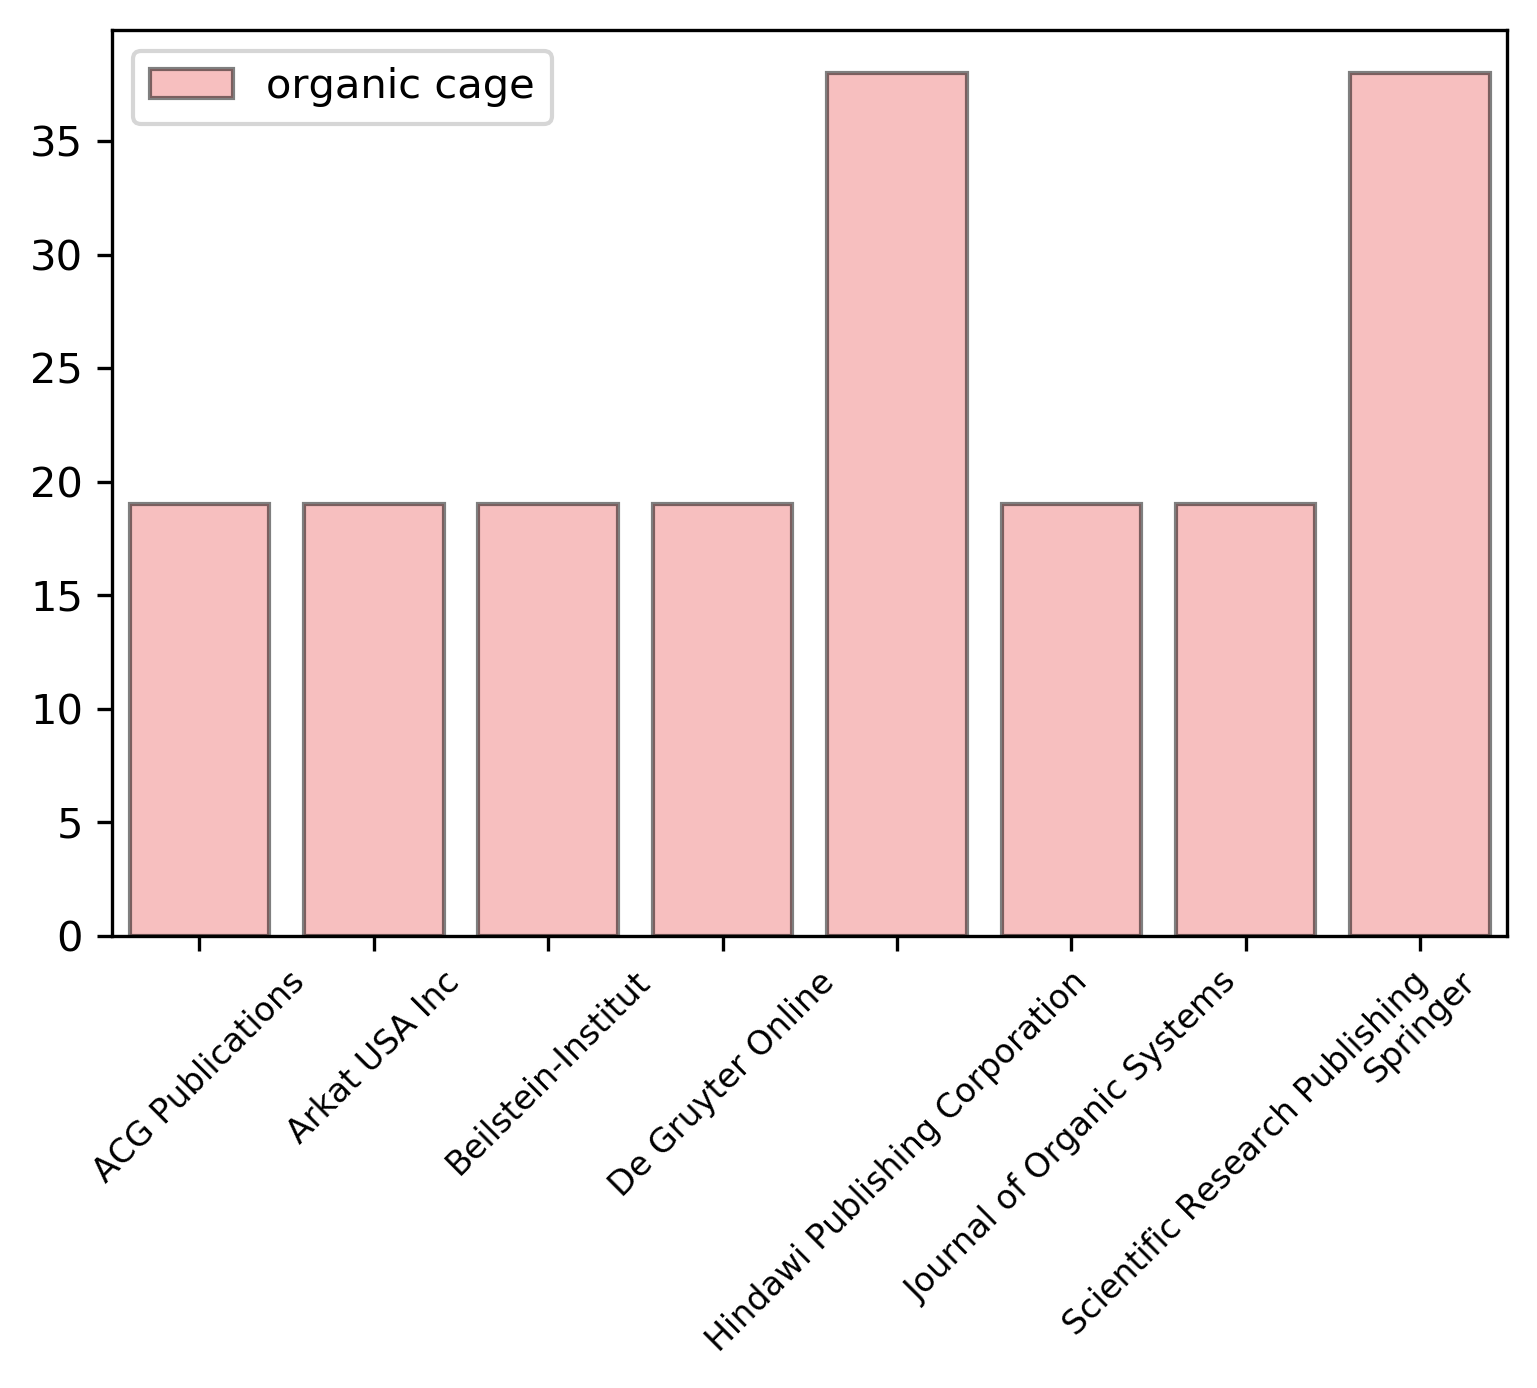

In [63]:

'''
Count and visualise in frequency histogram like before
'''
cnts = Counter(sorted(pub_list))
labels, values = zip(*sorted(cnts.items(), key=lambda x: x[0]))
indices = np.arange(len(labels))
fix, ax = plt.subplots()
ax.bar(indices+0.5, values, 0.8,color='lightcoral',edgecolor='black',alpha=0.5, label='organic cage')
plt.xlim([0, indices.size])
plt.xticks(indices+0.5, labels, fontsize=8, rotation=45)
plt.legend()
plt.show()

In [93]:
cnts = Counter(pub_list)

In [94]:
cnts2 = {}
for key, val in cnts.items():
    if val >= 100 and key:
        cnts2[key] = val

In [95]:
cnts2

{'Wiley': 301,
 'Springer Science and Business Media LLC': 151,
 'Royal Society of Chemistry (RSC)': 325,
 'American Chemical Society (ACS)': 316,
 'Elsevier BV': 263,
 'Iowa State University Digital Repository': 107,
 'Springer Nature': 319,
 'Office of Scientific and Technical Information  (OSTI)': 122,
 'Hindawi Limited': 159,
 'FapUNIFESP (SciELO)': 116}

In [102]:
cnts3 = {}
for key, val in cnts2.items():
    cnts3[key] = val

In [103]:
cnts3['Springer Nature'] = 319 + 151

In [104]:
del cnts3['Springer Science and Business Media LLC']

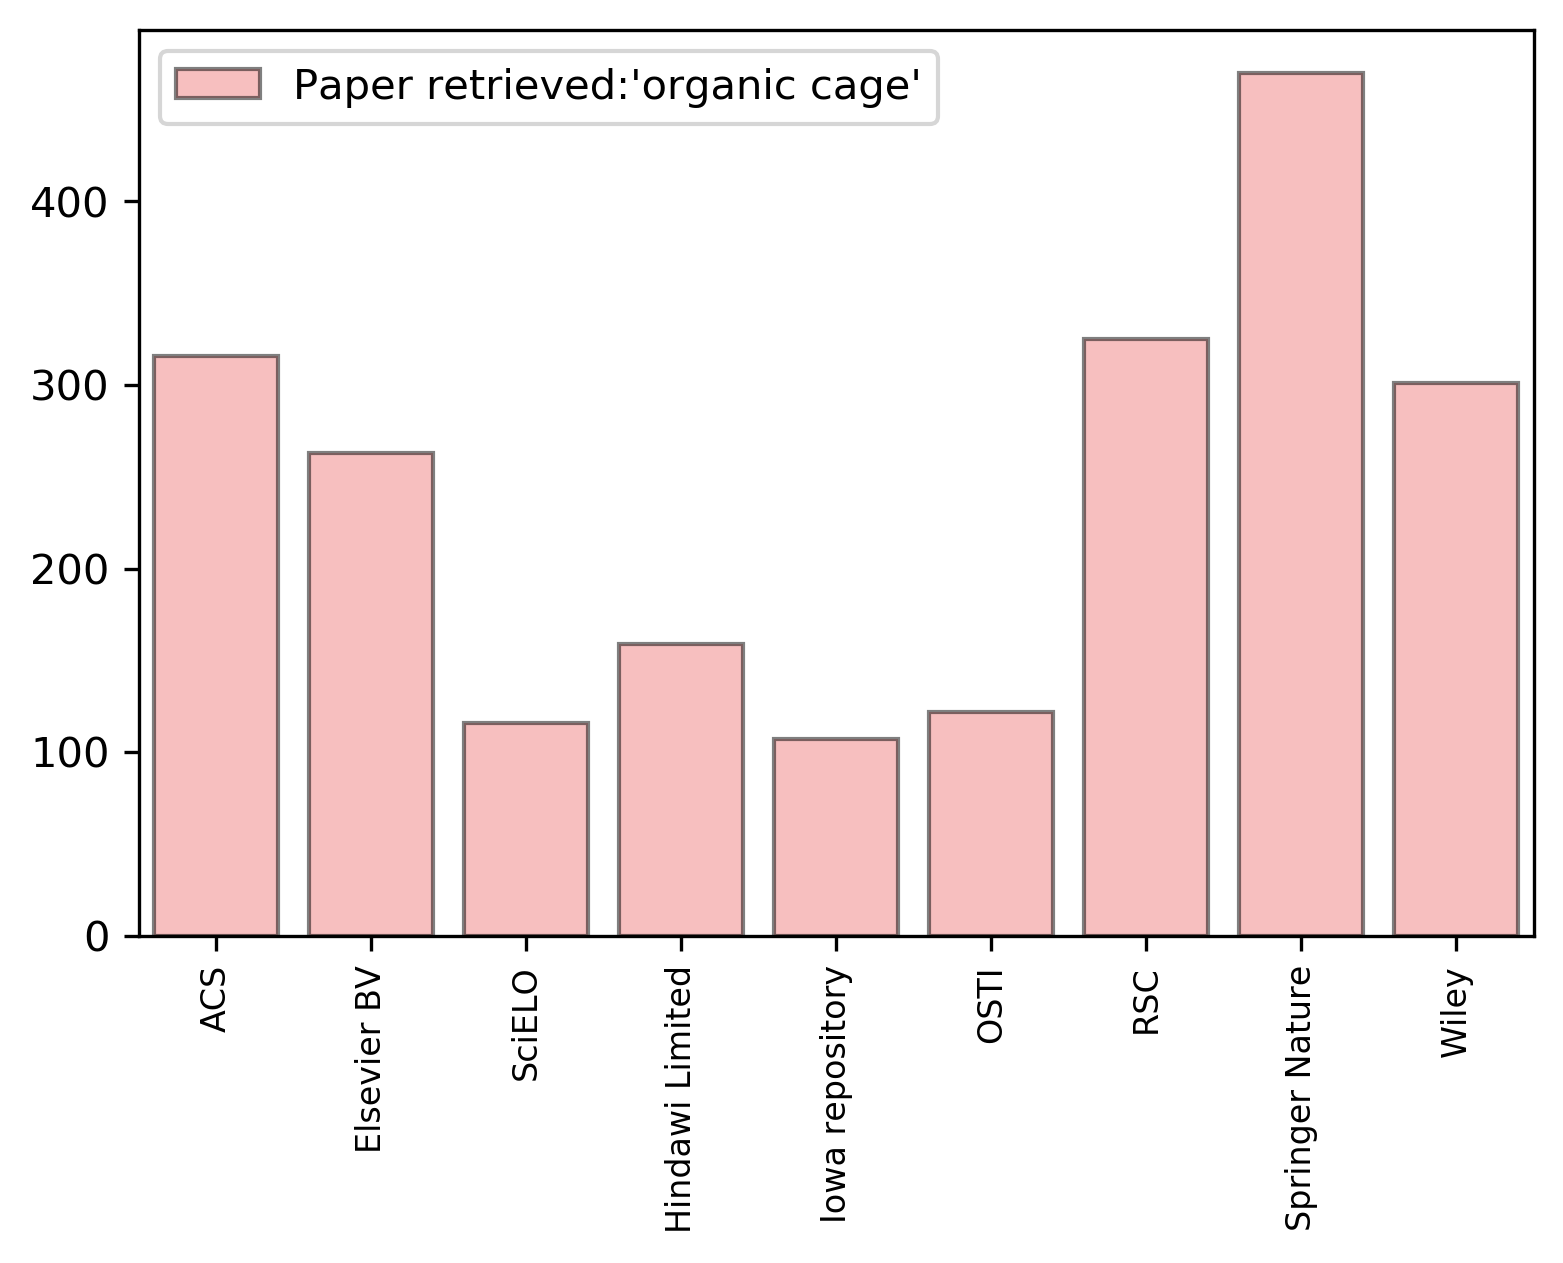

In [107]:

'''
Count and visualise in frequency histogram like before
'''
#cnts = Counter(sorted(pub_list))
labels, values = zip(*sorted(cnts3.items(), key=lambda x: x[0]))
labels = ['ACS', 'Elsevier BV', 'SciELO','Hindawi Limited', 'Iowa repository', 'OSTI','RSC','Springer Nature', 'Wiley']

indices = np.arange(len(labels))
fix, ax = plt.subplots()
ax.bar(indices+0.5, values, 0.8,color='lightcoral',edgecolor='black',alpha=0.5, label='Paper retrieved:\'organic cage\'')
plt.xlim([0, indices.size])
plt.xticks(indices+0.5, labels, fontsize=8, rotation='vertical')
plt.legend()
plt.show()